In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv("A1_JPYUSD.csv", index_col = 0, parse_dates = True)

<AxesSubplot:>

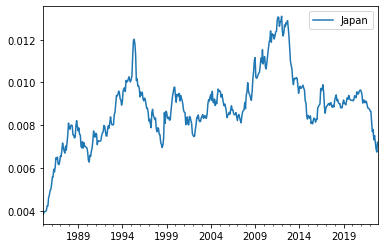

In [3]:
data.plot()

# 1a. 
Use the first $80\%$ of the data to determine the appropriate hyperparameters for an ARIMA(p,d,q) for making forecasts of the JPYUSD series.
\part For the last $20\%$ of the data, make a series of out-of-sample one month ahead, forecasts of the JPYUSD exchange rate along with a $90\%$ confidence interval for each forecast. (Hint: You may need to use a loop).


In [4]:
cut = int(len(data)*.8)
train, test = data[0:cut], data[cut:]

In [5]:
# We use a simulated AR(2) series for this example
import pmdarima as pm
arima = pm.auto_arima(train, d = 1, start_p = 1, start_q = 0,
                      suppress_warnings=True)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(2, 1, 0)   Log Likelihood                2462.692
Date:                Fri, 27 Jan 2023   AIC                          -4919.383
Time:                        15:17:24   BIC                          -4907.700
Sample:                             0   HQIC                         -4914.739
                                - 364                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0900      0.045      2.018      0.044       0.003       0.177
ar.L2          0.0947      0.050      1.898      0.058      -0.003       0.192
sigma2      7.494e-08   4.22e-09     17.775      0.000    6.67e-08    8.32e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.98
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 1b. 
For the last $20\%$ of the data, make a series of out-of-sample one month ahead, forecasts of the JPYUSD exchange rate along with a $90\%$ confidence interval for each forecast. (Hint: You may need to use a loop).

In [27]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    lower = list()
    upper = list()
    for t in range(0, len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        forecast = model_fit.get_forecast()
        yhat = forecast.predicted_mean[0]
        l,u = forecast.conf_int(alpha=0.05)[0]
        predictions.append(yhat)
        lower.append(l)
        upper.append(u)
        history.append(test[t])
    # calculate out of sample error
    test = pd.DataFrame(test)
    test["predictions"] = predictions
    test["lower"] = lower
    test["upper"] = upper
    return test
y = evaluate_arima_model(data["Japan"], (2,1,0))

C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kunzn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [28]:
y

,Japan,predictions,lower,upper
2015-05-01,0.008081,0.008443,0.007906,0.008979
2015-06-01,0.008167,0.008060,0.007523,0.008597
2015-07-01,0.008066,0.008140,0.007603,0.008676
2015-08-01,0.008251,0.008066,0.007530,0.008602
2015-09-01,0.008337,0.008257,0.007722,0.008792
...,...,...,...,...
2022-07-01,0.007519,0.007285,0.006773,0.007797
2022-08-01,0.007214,0.007491,0.006980,0.008003
2022-09-01,0.006909,0.007208,0.006697,0.007720
2022-10-01,0.006746,0.006853,0.006341,0.007366


# 1c. 
Generate a plot of an equity curve showing what your returns for the out-of-sample testing period would have been if you had gone long when you forecasted the exchange rate to increase and short when you forecasted the exchange rate would decrease. Hold each position for a single period.

In [32]:
# compute whether we are going long or short
y["Signals"] = np.where(y["predictions"].diff()>0, 1,-1)

# get the series of log returns
y["returns"] = np.log(y["Japan"]/y["Japan"].shift())

# compute the long and short returns
y["strategy returns"] = y["Signals"]*y["returns"] 

# convert to simple returns
y["Cumulative Returns"] = (np.exp(y["strategy returns"].cumsum())-1)*100

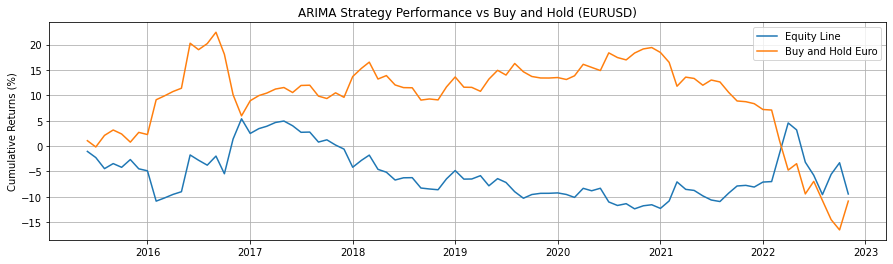

In [33]:
plt.figure(figsize = (15, 4))
plt.plot(y["Cumulative Returns"])
plt.plot((np.exp(y["returns"].cumsum())-1)*100)
plt.ylabel("Cumulative Returns (%)")
plt.title("ARIMA Strategy Performance vs Buy and Hold (EURUSD)")
plt.legend(["Equity Line", "Buy and Hold Euro"])
plt.grid()

# 1d. 
Compute the continuously compounded and annualized returns of the trading strategy.

In [43]:
P = 1000
A = 1000 *((y["Cumulative Returns"][-1]/100)+1)
T = len(data)/12
ccror = np.log(A/P)/T

ccror

-0.0026160563344129945

In [45]:
annualized= (A/P)**(1/T)-1
annualized

-0.002612637441029686

# 2a. 
Perform The DMW test on your forecasts. Were you able to outperform the random walk?

In [55]:
import scipy.stats as st

y["Error"] = y["Japan"]-y["predictions"]
y["Random Walk"] = y["Japan"]- y["Japan"].shift()

In [56]:
P = len(y)
MSE_T = np.sum(np.square(y["Error"]))/P
MSE_R = np.sum(np.square(y["Random Walk"]))/P

In [57]:
### DMW statistic
## V_hat
error_R = y['Random Walk'].reset_index(drop=True)
error_T = y['Error'].reset_index(drop=True)
tmp = np.square(error_R) - np.square(error_T) - (MSE_R - MSE_T)
V_hat = np.sum(np.square(tmp))/P

## Statistic
DMW = (MSE_R - MSE_T)/np.sqrt(V_hat/P)

print('Since the DMW statitsic is equal to ' + str(DMW) + ',' + ' which is less than the critical value (' + str(round(st.norm.ppf(.95),2)) + '),')
print('we fail to reject the null hypothesis that the MP model does not outperform the random walk model.')

Since the DMW statitsic is equal to -0.99390231040089, which is less than the critical value (1.64),
we fail to reject the null hypothesis that the MP model does not outperform the random walk model.


# 2a. 
Perform The Clark-West test on your forecasts. Were you able to outperform the random walk?

In [62]:
y["s_change_pred"] = y["predictions"]- y["Japan"].shift()

In [63]:
### CW statistic
tmp2 = np.sum(np.square(y["s_change_pred"]))/P
CW = (MSE_R - MSE_T + tmp2)/np.sqrt(V_hat/P)

print('Since the CW statitsic is equal to ' + str(CW) + ',' + ' which is less than the critical value (' + str(round(st.norm.ppf(.95),2)) + '),')
print('we fail to reject the null hypothesis that the MP model does not outperform the random walk model.')

Since the CW statitsic is equal to -0.4187739576140971, which is less than the critical value (1.64),
we fail to reject the null hypothesis that the MP model does not outperform the random walk model.
